In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ESN:
    def __init__(self, reservoir_size, spectral_radius=0.9):
        self.reservoir_size = reservoir_size
        self.W_res = np.random.rand(reservoir_size, reservoir_size) - 0.5
        self.W_res *= spectral_radius / np.max(np.abs(np.linalg.eigvals(self.W_res)))

        self.W_in = np.random.rand(reservoir_size, 1) - 0.5
        self.W_out = None
    
    def train(self, input_data, target_data):
        reservoir_states = self.run_reservoir(input_data)

        self.W_out = np.dot(np.linalg.pinv(reservoir_states), target_data)
    
    def predict(self, input_data):
        reservoir_states = self.run_reservoir(input_data)
        predictions = np.dot(reservoir_states, self.W_out)

        return predictions
    
    def run_reservoir(self, input_data):
        reservoir_states = np.zeros((len(input_data), self.reservoir_size))

        for t in range(1, len(input_data)):
            reservoir_states[t, :] = np.tanh(np.dot(self.W_res, reservoir_states[t - 1, :]) + np.dot(self.W_in, input_data[t]))
        
        return reservoir_states

In [23]:
time = np.arange(0, 20, 0.1)
noise = 0.1 * np.random.rand(len(time))
sine_wave_target = np.sin(time)

reservoir_size = 150

esn = ESN(reservoir_size)

In [24]:
training_input = noise[:, None]
training_target = sine_wave_target[:, None]

esn.train(training_input, training_target)

test_input = noise[:, None]

In [25]:
predictions = esn.predict(test_input)

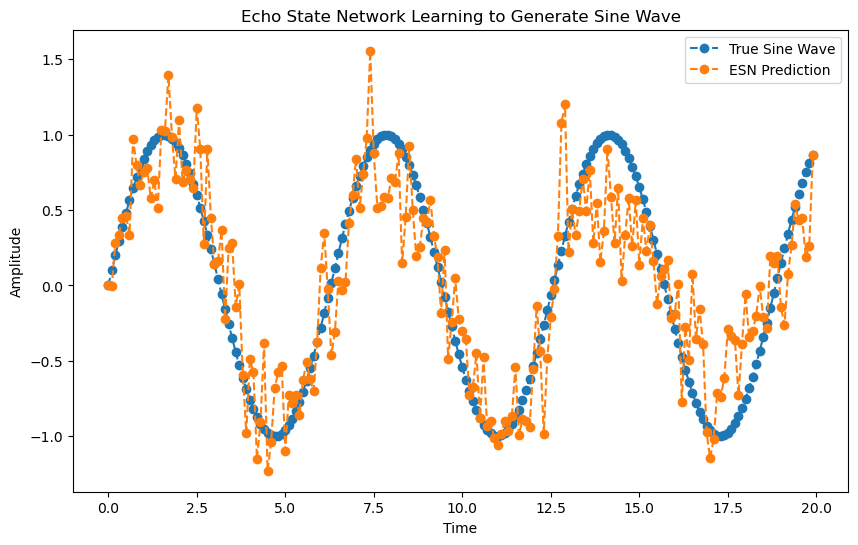

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(time, sine_wave_target, label='True Sine Wave',
         linestyle='--', marker='o')
plt.plot(time, predictions, label='ESN Prediction', linestyle='--', marker='o')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Echo State Network Learning to Generate Sine Wave')
plt.show()